## Setup data

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

RANDOM_STATE = 42

centers = 10
X, y = make_blobs(
    n_samples = 50_000,
    centers=centers,
    random_state=RANDOM_STATE,
)

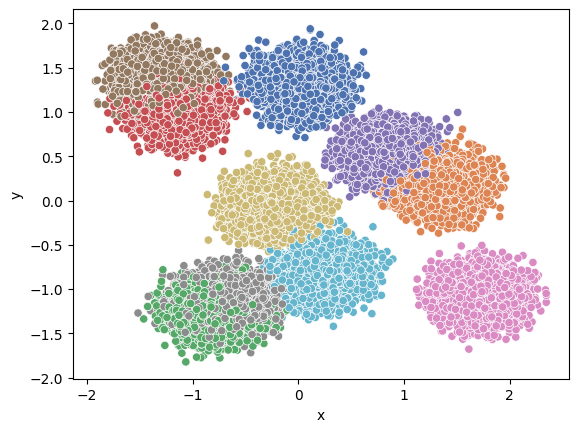

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

scaled_X = StandardScaler().fit_transform(X)
sns.scatterplot(
  x=[point[0] for point in scaled_X],
  y=[point[1] for point in scaled_X],
  hue=y,
  palette="deep",
  legend=None,
)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=.3, random_state=RANDOM_STATE
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape

((35000, 2), (15000, 2))

## Model implementation

In [ ]:
import numpy as np
from numpy.random import uniform
from abc import ABC, abstractmethod

class KMeansModel:
  def __init__(self, n_clusters: int=5, max_iter: int=300):
    self.n_clusters = n_clusters
    self.max_iter = max_iter

  def _get_euclidian_distance(self, point, data):
    return np.sqrt(
        np.sum((point - data) ** 2, axis=1)
    )

  def fit(self, X: np.array, y: np.array):
    range_min = np.min(X, axis=0)
    range_max = np.max(X, axis=0)

    self.centroids = [
        uniform(range_min, range_max) for _ in range(self.n_clusters)
    ]

    curr_iter = 0
    prev_centroids = None
    while (
      np.not_equal(self.centroids, prev_centroids).any()
      and curr_iter < self.max_iter
    ):
      sorted_points = [[] for _ in range(self.n_clusters)]
      for i in range(len(X)):
        distances = self._get_euclidian_distance(X[i], self.centroids)
        centroid_idx = np.argmin(distances)
        sorted_points[centroid_idx].append(X[i])

      prev_centroids = self.centroids
      self.centroids = [np.mean(cluster, axis=0) for cluster in sorted_points]
      for i, centroid in enumerate(self.centroids):
        if np.isnan(centroid).any():
          self.centroids[i] = prev_centroids[i]

      curr_iter += 1

  def transform(self, X):
    centroid_idxs = []
    for i in range(len(X)):
      distances = self._get_euclidian_distance(X[i], self.centroids)
      centroid_idx = np.argmin(distances)
      centroid_idxs.append(centroid_idx)
    return np.array(centroid_idxs)


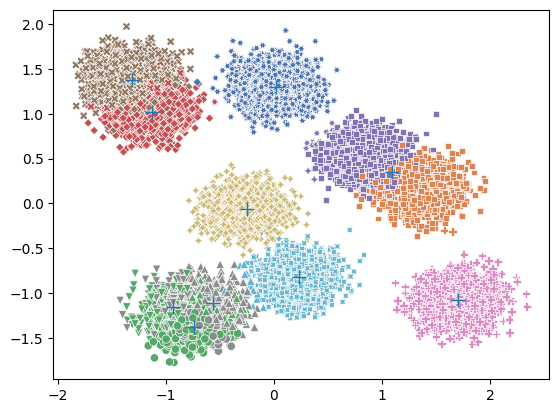

In [ ]:
kmeans = KMeansModel(n_clusters=10)
kmeans.fit(X_train, y_train)

class_centers = kmeans.centroids
y_pred = kmeans.transform(X_test)
sns.scatterplot(
  x=[point[0] for point in X_test],
  y=[point[1] for point in X_test],
  hue=y_test,
  style=y_pred,
  palette="deep",
  legend=None
)
plt.plot(
  [x for x, _ in kmeans.centroids],
  [y for _, y in kmeans.centroids],
  '+',
  markersize=10,
)
plt.show()

In [ ]:
np.array(class_centers).shape, y_pred.shape

((10, 2), (15000,))